In [2]:
import sys
sys.path.append('E:/Graduate Study Material/ML/Assignments/hw4')
import mltools as ml
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
%matplotlib inline

# P1: Setting up the data
## 1.1

In [3]:
# Data Loading
X = np.genfromtxt(\
'E:/Graduate Study Material/ML/Assignments\/hw4/X_train.txt',delimiter=None)
Y = np.genfromtxt(\
'E:/Graduate Study Material/ML/Assignments/hw4/Y_train.txt',delimiter=None)
X,Y = ml.shuffleData(X,Y)

print('Min of features:',np.min(X, axis=0))
print('Max of features:',np.max(X, axis=0))
print('Mean of features:',np.mean(X, axis=0))
print('Var of features:',np.var(X,axis=0))

Min of features: [ 1.9350e+02  1.5250e+02  2.1425e+02  1.5250e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  8.7589e-01  0.0000e+00  0.0000e+00  0.0000e+00
  9.9049e-01 -9.9990e+02]
Max of features: [2.5300e+02 2.4900e+02 2.5250e+02 2.5250e+02 3.1048e+04 1.3630e+04
 9.2380e+03 1.2517e+02 1.9167e+01 1.3230e+01 6.6761e+01 7.3902e+01
 9.7504e+02 7.9720e+02]
Mean of features: [2.41601104e+02 2.27376571e+02 2.41554150e+02 2.32826768e+02
 3.08992337e+03 9.28259020e+02 1.38093830e+02 3.24857933e+00
 6.49865290e+00 2.09713912e+00 4.21766041e+00 2.69171845e+00
 1.02715905e+01 5.78148050e+00]
Var of features: [8.34991711e+01 9.26255931e+01 3.52863398e+01 9.76257317e+01
 1.56515138e+07 3.08176182e+06 4.43951746e+05 8.21948502e+00
 6.40504819e+00 4.36344047e+00 4.08637188e+00 2.19877847e+00
 4.04646245e+02 3.40652055e+03]


## 1.2

In [4]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]   # subsample for efficiency
XtS, params = ml.rescale(Xt)   # Normalize the features
XvS, _ = ml.rescale(Xva, params)   # Normalize the features

print('Min（rescaled XtS）:',np.min(XtS, axis=0))
print('Max（rescaled XtS）:',np.max(XtS, axis=0))
print('Mean（rescaled XtS）:',np.mean(XtS,axis=0))
print('Var（rescaled XtS）:',np.var(XtS,axis=0))

print('\nMin（rescaled XvS）:',np.min(XvS, axis=0))
print('Max（rescaled XvS）:',np.max(XvS, axis=0))
print('Mean（rescaled XvS）:',np.mean(XvS,axis=0))
print('Var（rescaled XvS）:',np.var(XvS,axis=0))

Min（rescaled XtS）: [ -4.59765504  -3.70045824  -4.46517604  -2.57468052  -0.76882236
  -0.51051071  -0.20792186  -1.15328592  -2.22645127  -0.99343789
  -2.05260172  -1.91879203  -0.64673099 -19.18442151]
Max（rescaled XtS）: [ 1.24002586  2.23807036  1.82787208  1.97765342  7.17551686  7.14970154
 13.53000624  7.28062917  4.50835751  4.39742452  5.82386379  5.94826425
 33.30617004 10.78225409]
Mean（rescaled XtS）: [ 1.19270871e-14 -3.87556653e-16 -5.18040943e-14 -2.75288459e-14
  4.01012556e-17 -1.59794400e-16  1.79978255e-16  1.95659045e-15
  2.97617486e-15 -2.60620414e-15 -3.56925600e-15 -3.31318306e-15
 -8.91486884e-16  6.59083899e-17]
Var（rescaled XtS）: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Min（rescaled XvS）: [ -5.14837965  -3.90882767  -4.58590598  -2.89384037  -0.76933431
  -0.51051071  -0.20792186  -1.15328592  -2.22645127  -0.99343789
  -2.05260172  -1.91879203  -0.6493494  -19.18442151]
Max（rescaled XvS）: [ 1.24002586  2.23807036  1.82787208  1.97765342  7.17551686  7.149

# P2: Linear Classifiers
## 2.1

E:/Graduate Study Material/ML/Assignments/hw4\mltools\base.py:97: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
E:/Graduate Study Material/ML/Assignments/hw4\mltools\linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
E:/Graduate Study Material/ML/Assignments/hw4\mltools\linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
E:/Graduate Study Material/ML/Assignments/hw4\mltools\linearC.py:121: RuntimeWarning: invalid value encountered in greater
  yhati = 1.0 if respi > 0 else 0.0   # convert to 0/1 prediction


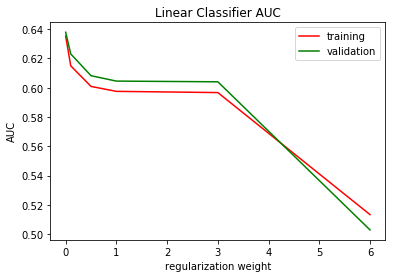

In [5]:
reg = [0.0, 0.1, 0.5, 1.0, 3.0, 6.0]
tr_auc = np.zeros(len(reg))
va_auc = np.zeros(len(reg))
for i,r in enumerate(reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=r, initStep=0.5, \
                  stopTol=1e-3, stopIter=50)
    tr_auc[i] = learner.auc(XtS, Yt) # train AUC
    va_auc[i] = learner.auc(XvS, Yva) 

plt.plot(reg, tr_auc, color='r', label='training')
plt.plot(reg, va_auc, color='g', label='validation')
plt.xlabel("regularization weight")
plt.ylabel("AUC")
plt.title("Linear Classifier AUC")
plt.legend()
plt.show()

## 2.2

In [6]:
# Add degree 2 polynomial features
XtP = ml.transforms.fpoly(Xt, 2, bias=False)
XtP, params = ml.transforms.rescale(XtP)
XvP = ml.transforms.rescale(ml.transforms.fpoly(Xva,2,\
                                bias=False),params)[0] 

In [7]:
print("Number of Features(Xt):",Xt.shape[1])
print("Number of Features(XtP):",XtP.shape[1])

Number of Features(Xt): 14
Number of Features(XtP): 119


The result shows that before adding degree 2 polynomial features, the number of features is 14, after adding degree 2 polynomial features, the number becomes 119. This is because there will be 14 quadratic terms of features and $C_{14}^2=\frac{14*13}{2}$ terms of cross product of any two features add to the original 14 features. As a result, 14+14+(14*13)/2 = 119

## 2.3

E:/Graduate Study Material/ML/Assignments/hw4\mltools\linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
E:/Graduate Study Material/ML/Assignments/hw4\mltools\linearC.py:121: RuntimeWarning: invalid value encountered in greater
  yhati = 1.0 if respi > 0 else 0.0   # convert to 0/1 prediction
E:/Graduate Study Material/ML/Assignments/hw4\mltools\base.py:97: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
E:/Graduate Study Material/ML/Assignments/hw4\mltools\linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )


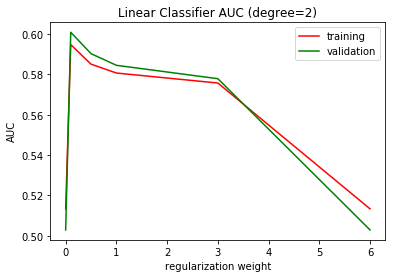

In [8]:
for i,r in enumerate(reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtP, Yt, reg=r, initStep=0.5, \
                  stopTol=1e-3, stopIter=50)
    tr_auc[i] = learner.auc(XtP, Yt) 
    va_auc[i] = learner.auc(XvP, Yva) 

plt.plot(reg, tr_auc, color='r', label='training')
plt.plot(reg, va_auc, color='g', label='validation')
plt.xlabel("regularization weight")
plt.ylabel("AUC")
plt.title("Linear Classifier AUC (degree=2)")
plt.legend()
plt.show()

# P3: Nearest Neighbors
## 3.1

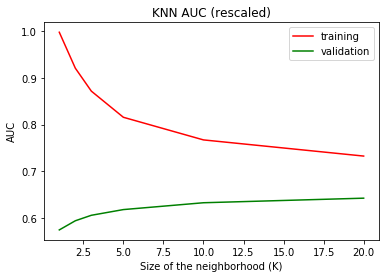

In [11]:
K = [1,2,3,5,10,20]
tr_auc = np.zeros(len(K))
va_auc = np.zeros(len(K))
learner = ml.knn.knnClassify()

for i,k in enumerate(K):
    learner.train(XtS, Yt, K=k, alpha=0.0)
    tr_auc[i] = learner.auc(XtS, Yt) 
    va_auc[i] = learner.auc(XvS, Yva) 

plt.plot(K, tr_auc, color='r', label='training')
plt.plot(K, va_auc, color='g', label='validation')
plt.xlabel("Size of the neighborhood (K)")
plt.ylabel("AUC")
plt.title("KNN AUC (rescaled)")
plt.legend()
plt.show()

## 3.2

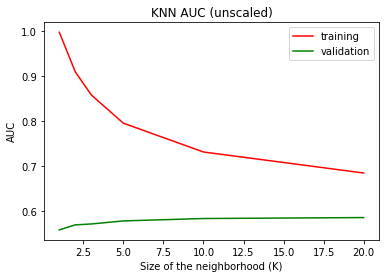

In [12]:
for i,k in enumerate(K):
    learner.train(Xt, Yt, K=k, alpha=0.0)
    tr_auc[i] = learner.auc(Xt, Yt) 
    va_auc[i] = learner.auc(Xva, Yva) 

plt.plot(K, tr_auc, color='r', label='training')
plt.plot(K, va_auc, color='g', label='validation')
plt.xlabel("Size of the neighborhood (K)")
plt.ylabel("AUC")
plt.title("KNN AUC (unscaled)")
plt.legend()
plt.show()

## 3.3

The rescaled and unscaled data have similar training and validation performance in 3.1 and 3.2. I just choose unscaled data for this question.

In [13]:
K = [1,2,3,5,10]
A = range(0,4,1) 
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))

for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner.train(Xt, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(Xt, Yt) 
        va_auc[i][j] = learner.auc(Xva, Yva)

E:/Graduate Study Material/ML/Assignments/hw4\mltools\knn.py:103: RuntimeWarning: invalid value encountered in true_divide
  prob[i,:] = count / count.sum()    # save (soft) results


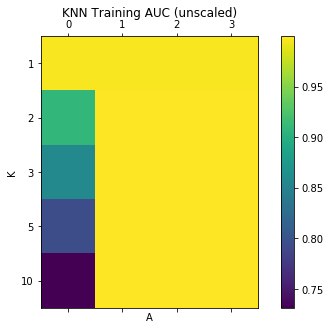

In [14]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(A))
ax.set_yticklabels(['']+list(K))
ax.set_xlabel("A")
ax.set_ylabel("K")
ax.set_title("KNN Training AUC (unscaled)")
plt.show()

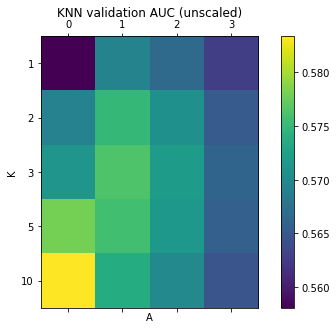

In [15]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+list(A))
ax.set_yticklabels(['']+list(K))
ax.set_xlabel("A")
ax.set_ylabel("K")
ax.set_title("KNN validation AUC (unscaled)")
plt.show()

Based on the results, I recommend K = 10,a = 0. Since when K = 10,a = 0, the validation AUC is the highest.

# P4: Decision Trees

In [16]:
mDep = range(1,30,3)
tr_auc = np.zeros(len(mDep))
va_auc = np.zeros(len(mDep))
sz1 = np.zeros(len(mDep))
sz2 = np.zeros(len(mDep))

learner = ml.dtree.treeClassify()

for i,d in enumerate(mDep):
    learner.train(Xt, Yt, maxDepth=d, minParent=2, minLeaf=1)
    tr_auc[i] = learner.auc(Xt, Yt) 
    va_auc[i] = learner.auc(Xva, Yva) 
    # store the number of nodes in the tree as maxDepth is varied
    sz1[i] = learner.sz
    
    # store the number of nodes after increasing minParent to 4
    learner.train(Xt, Yt, maxDepth=d, minParent=4, minLeaf=1)
    sz2[i] = learner.sz

## 4.1

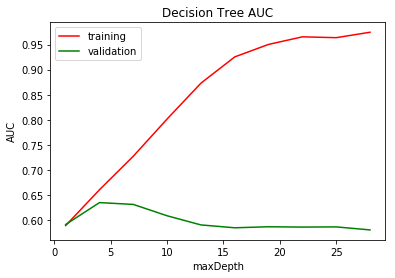

In [17]:
plt.plot(mDep, tr_auc, color='r', label='training')
plt.plot(mDep, va_auc, color='g', label='validation')
plt.xlabel("maxDepth")
plt.ylabel("AUC")
plt.title("Decision Tree AUC")
plt.legend()
plt.show()

## 4.2

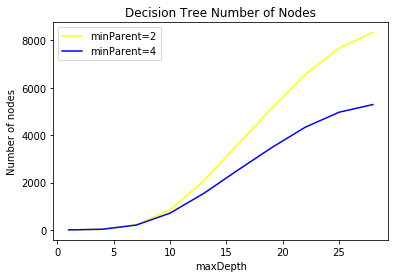

In [18]:
plt.plot(mDep, sz1, color='yellow', label='minParent=2')
plt.plot(mDep, sz2, color='blue', label='minParent=4')
plt.xlabel("maxDepth")
plt.ylabel("Number of nodes")
plt.title("Decision Tree Number of Nodes")
plt.legend()
plt.show()

## 4.3

In [19]:
# Set maxDepth = 15
mPar = range(2,15,3) 
mLea = range(1,11,2) 
tr_auc = np.zeros((len(mPar),len(mLea)))
va_auc = np.zeros((len(mPar),len(mLea)))
for i,p in enumerate(mPar):
    for j,l in enumerate(mLea):
        learner.train(Xt, Yt, maxDepth=15, \
                      minParent=p, minLeaf=l)
        tr_auc[i][j] = learner.auc(Xt, Yt) 
        va_auc[i][j] = learner.auc(Xva, Yva)

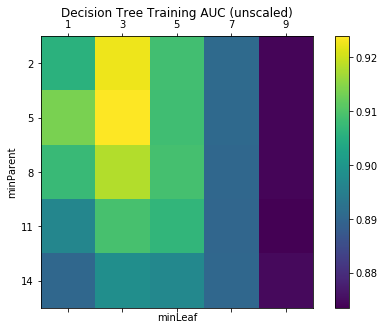

In [20]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(mLea))
ax.set_yticklabels(['']+list(mPar))
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("Decision Tree Training AUC (unscaled)")
plt.show()

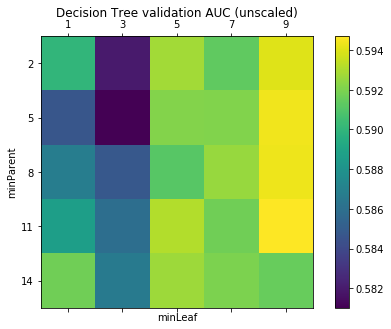

In [21]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+list(mLea))
ax.set_yticklabels(['']+list(mPar))
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("Decision Tree validation AUC (unscaled)")
plt.show()

Based on the results, I recommend minParent = 11, minLeaf = 9. Since when minParent = 11, minLeaf = 9, the validation AUC is the highest.

# P5: Neural Networks
## 5.1

In [22]:
nlayers = range(1,4,1) 
nnodes = range(2,11,2) 

tr_auc = np.zeros((len(nlayers),len(nnodes)))
va_auc = np.zeros((len(nlayers),len(nnodes)))

for i, layer in enumerate(nlayers):
    for j, node in enumerate(nnodes):
        nn = ml.nnet.nnetClassify()
        size = [XtS.shape[1]] + [node]*layer + [2]
        nn.init_weights(size, 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt) 
        va_auc[i][j] = nn.auc(XvS, Yva)

it 1 : Jsur = 0.4337906936777578, J01 = 0.3454
it 2 : Jsur = 0.4288300055831226, J01 = 0.3454
it 4 : Jsur = 0.4257687998650221, J01 = 0.3454
it 8 : Jsur = 0.4242441771538356, J01 = 0.3212
it 16 : Jsur = 0.4239062344032037, J01 = 0.3252
it 32 : Jsur = 0.42400444834523715, J01 = 0.3292
it 64 : Jsur = 0.4242039696558546, J01 = 0.33
it 128 : Jsur = 0.4244319929775412, J01 = 0.3328
it 256 : Jsur = 0.42463471148110454, J01 = 0.3338
it 1 : Jsur = 0.4332427688030665, J01 = 0.322
it 2 : Jsur = 0.4265719364358939, J01 = 0.322
it 4 : Jsur = 0.4223590315727417, J01 = 0.3162
it 8 : Jsur = 0.41961670311191374, J01 = 0.3112
it 16 : Jsur = 0.41784768453510696, J01 = 0.3108
it 32 : Jsur = 0.41641155834222043, J01 = 0.3098
it 64 : Jsur = 0.41483293726282455, J01 = 0.3106
it 128 : Jsur = 0.41351852626521596, J01 = 0.3136
it 256 : Jsur = 0.41236760852357013, J01 = 0.3124
it 1 : Jsur = 0.4334141981372617, J01 = 0.3172
it 2 : Jsur = 0.4260333925865956, J01 = 0.3212
it 4 : Jsur = 0.42199052383689667, J01 = 0

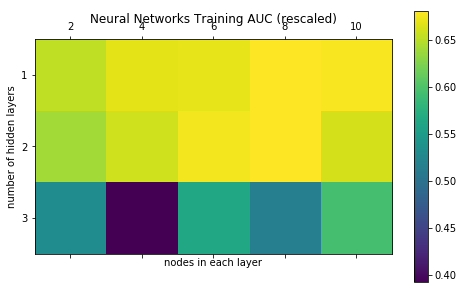

In [23]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(nnodes))
ax.set_yticklabels(['']+list(nlayers))
ax.set_xlabel("nodes in each layer")
ax.set_ylabel("number of hidden layers")
ax.set_title("Neural Networks Training AUC (rescaled)")
plt.show()

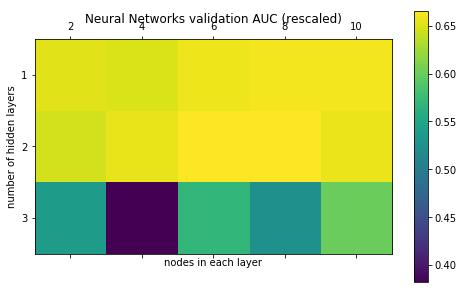

In [24]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+list(nnodes))
ax.set_yticklabels(['']+list(nlayers))
ax.set_xlabel("nodes in each layer")
ax.set_ylabel("number of hidden layers")
ax.set_title("Neural Networks validation AUC (rescaled)")
plt.show()

In [29]:
print("Train AUC: ",tr_auc)
print("Validation AUC: ",va_auc)

Train AUC:  [[0.65292365 0.66944289 0.66996177 0.67991565 0.67769167]
 [0.64089059 0.65946176 0.67549015 0.68083967 0.66221419]
 [0.53281468 0.39208967 0.56384765 0.51620672 0.59622526]]
Validation AUC:  [[0.65306168 0.64984463 0.65820165 0.66031174 0.66059616]
 [0.64598297 0.65693569 0.66500324 0.66580034 0.65786961]
 [0.53851979 0.38221797 0.56993408 0.52478491 0.60073878]]


Based in the results, I recommend number of hidden layers = 2, nodes in each layer = 8. Since in this case the validation AUC is the highest.

## 5.2

I define Gaussian as a new activation function.

In [25]:
# define Gaussian as the activation function
def sig(z): return np.atleast_2d(np.exp(-z**2/2))
def dsig(z): return np.atleast_2d(-z*np.exp(-z**2/2))

In [26]:
methods = ['logistic' , 'htangent', 'Gaussian']
for i,m in enumerate(methods):
    nn = ml.nnet.nnetClassify()
    nn.init_weights([Xt.shape[1], 5, 2], 'random', XtS, Yt)
    if m == 'Gaussian':
        nn.setActivation('custom', sig, dsig)
    else:
        nn.setActivation(m)
    nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=100)
    print("{0:>15}: {1:.4f}".format(m+' Train AUC',\
                                    nn.auc(XtS, Yt)))
    print("{0:>15}: {1:.4f}".format(m+' Validation AUC', \
                                    nn.auc(XvS, Yva)))

it 1 : Jsur = 0.43621529167907663, J01 = 0.3454
it 2 : Jsur = 0.4301176094502723, J01 = 0.3454
it 4 : Jsur = 0.4278003099093496, J01 = 0.3454
it 8 : Jsur = 0.4273252635967656, J01 = 0.3454
it 16 : Jsur = 0.4276471279989462, J01 = 0.3454
it 32 : Jsur = 0.42810945936773703, J01 = 0.3454
it 64 : Jsur = 0.42853106871197716, J01 = 0.3454
logistic Train AUC: 0.6473
logistic Validation AUC: 0.6507
it 1 : Jsur = 0.4338599333921006, J01 = 0.321
it 2 : Jsur = 0.42634535103518345, J01 = 0.3282
it 4 : Jsur = 0.4222108102853952, J01 = 0.318
it 8 : Jsur = 0.41943483800048326, J01 = 0.3134
it 16 : Jsur = 0.4177918427782879, J01 = 0.3138
it 32 : Jsur = 0.416518408522729, J01 = 0.3166
it 64 : Jsur = 0.4151519566725399, J01 = 0.3156
htangent Train AUC: 0.6627
htangent Validation AUC: 0.6554
it 1 : Jsur = 0.4429403932487565, J01 = 0.3454
it 2 : Jsur = 0.4339451865648806, J01 = 0.3454
it 4 : Jsur = 0.43185163504713, J01 = 0.3454
it 8 : Jsur = 0.43071503864735894, J01 = 0.3454
it 16 : Jsur = 0.431023410851

The results show that htangent has the highest train AUC and validation AUC.

# P6: Conclusions

Based on previous question, I choose Decision Tree because it has high validation AUC and also high training speed. 

As for parameters, based on problem 4.3, I choose minParent = 11, minLeaf= 9. In order to choose a better maxDepth, I conduct cross validation (folds=10) using various maxDepth and train all the data. 

In [30]:
Xte = np.genfromtxt(\
'E:/Graduate Study Material/ML/Assignments/hw4/X_test.txt',delimiter=None)

In [35]:
def crossVal(nFolds):      
    auc = np.zeros(nFolds)
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(X,Y,nFolds,iFold) 
        # use ith block as validation
        learner = ml.dtree.treeClassify()
        learner.train(Xti, Yti, maxDepth = d, minParent = 11, minLeaf= 9)
        # train on Xti, Yti, the data for this fold
        auc[iFold] = learner.auc(Xvi, Yvi)
        # compute the AUC on Xvi, Yvi and save it
    return np.mean(auc) 

In [36]:
mDep = range(15,35,2)
aucCV = np.zeros(len(mDep))
for i,d in enumerate(mDep):
    aucCV[i] = crossVal(10)

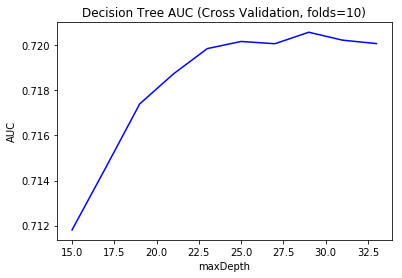

[0.71180941 0.71458079 0.71739765 0.71873226 0.71985358 0.72016968
 0.72006999 0.72057904 0.72022725 0.72007617]


In [38]:
plt.plot(mDep, aucCV, color='b')
plt.xlabel("maxDepth")
plt.ylabel("AUC")
plt.title("Decision Tree AUC (Cross Validation, folds=10)")
plt.show()

print(aucCV)

The result shows that when maxDepth = 29, the cross validation auc is highest. So, I train the desion tree with maxDepth = 29, minParent = 11, minLeaf= 9.

In [40]:
learner_dt = ml.dtree.treeClassify()
learner_dt.train(X, Y, maxDepth = 29, minParent = 11, minLeaf= 9)

Yte = np.vstack((np.arange(Xte.shape[0]), \
                 learner_dt.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit3.txt', Yte, '%d, %.2f', \
           header='ID,Prob1', comments='', delimiter=',')

My kaggle username is: xuan, leaderboard AUC: 0.72548

# Statement of Collaboration